# Jupyter notebooks 2: Data Wrangling

<img src = "https://ibm.box.com/shared/static/jmtb4pgle2dsdlzfmyrgv755cnqw95wk.png" width = 300, align = "center"></a>

## Índice

* [O que é e pra que serve o Data Wrangling?](#O-que-é-e-pra-que-serve-o-Data-Wrangling?)
* [Identificando e manipulando dados perdidos](#Identificando-e-manipulando-dados-perdidos)
* [Padronização dos dados](#Padronização-dos-dados)
* [Normalização dos dados](#Normalização-dos-dados)


## O que é e pra que serve o Data Wrangling?

Em tradução livre, data Wrangling pode significar tanto "brigar com" quanto "amarração" dos dados.
É o processo de transformar os dados do seu formato inicial para um formato que possa ser melhor analisado, conforme a proposta inicial do seu negócio/idéia. 

### Questão: qual o consumo por (L/100k) de um carro a Diesel?

### Importando os dados

Assim como anteriormente, vamos usar os dados de https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data ao longo deste módulo


Vamos efetuar a atribuição da URL a uma variável, importar o pandas e adicionar os cabeçalhos que não existem no arquivo original:

In [1]:
import pandas as pd

filename = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

df = pd.read_csv(filename, names = headers)
print("Executado com sucesso!")

Executado com sucesso!


Use o método **head()** para apresentar as primeiras 5 linhas de cada coluna:

In [2]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Como podemos ver, muitas interrogações apareceram no dataframe; estes valores que estão podem vir a atrapalhar nossas analises futuras. 
<div> Então, como vamos identificar esses valores perdidos e lidar com eles?</div> 


**Como tratar dados perdidos?**

Siga esses passos:
> 1. Identificar os dados perdidos
2. Tratar os dados perdidos
3. Corrigir o formato dos dados

#  Identificando e manipulando dados perdidos



### Convertendo de '?' para NaN
No dataset dos carros, os dados perdidos vêm representados pela interrogação "?".
Vamos trocar a "?" por NaN (Not a Number), que é o marcador padrão de valores perdidos do Python. Isso será efetuados por razões de conveniência e velocidade computacional de tratamento. Aqui está o uso da função: 
 <pre>.replace(A, B, inplace = True) </pre>
para trocar o 'A' por 'B' temos:

In [3]:
import numpy as np

# Alterar "?" por NaN
df.replace("?", np.nan, inplace = True)
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


### Avaliando os dados perdidos

Os dados perdidos foram convertidos para o padrão do Python. Agora podemos utilizar as funções nativas para identificar esses dados perdidos ao longo do dataframe.Existem dois métodos para identificar esses valores perdidos:

1.  **.isnull()**
2.  **.notnull()**

A saída é um valor Booleano indicando se o que foi passado como argumento é, de fato, um dados perdido.

In [4]:
# Dados com valor TRUE serão, de fato, dados perdidos
missing_data = df.isnull()
missing_data.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Contando dados perdidos em cada coluna
Utilizando o loop for em Python, podemos ver rápidamente o número de valores perdidods em cada coluna. Como mencionado acima, **True** representa um dado perdido, **False** significa que o valor está presente no dataset. No corpo do loop for o método ".value_couts()" conta o número dos valores "True". 

In [5]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

Baseado no resumo acima, cada coluna têm 205 linhas de dados e sete colunas contêm dados perdidos:

1. "normalized-losses": 41 dados perdidos
2. "num-of-doors": 2 dados perdidos
3. "bore": 4 dados perdidos
4. "stroke" : 4 dados perdidos
5. "horsepower": 2 dados perdidos
6. "peak-rpm": 2 dados perdidos
7. "price": 4 dados perdidos

<a id="ref3"></a>
## Tratando dados perdidos
**Como lidar com dados perdidos?**

    
    1. Excluindo os dados 
        a. Exclua toda a linha
        b. Exclua toda a coluna
    2. Repondo os dados
        a. Reponha os dados pela média
        b. Reponha os dados pela frequência
        c. Reponha os dados baseados por outras funções

Colunas inteiras podem ser eliminadas somente se a maioria das entradas na coluna estiverem vazias. Em nosso dataset, ennhuma das colunas está vazia o suficiente para ser eliminada por completo.
Nós temos alguma liberdade na escolha sobre qual método usar para repor os dados; todavia, alguns métodos parecem ser mais coerentes do que outros. Nós vamos utilizar colunas diferentes:

**Repondo pela média:**

    "normalized-losses": 41 dados perdidos, reposto com a média
    "stroke": 4 dados perdidos, reposto com a média
    "bore": 4 dados perdidos, reposto com a média
    "horsepower": 2 dados perdidos, reposto com a média
    "peak-rpm": 2 dados perdidos, reposto com a média
    
**Repondo pela frequência:**

    "num-of-doors": 2 dados perdidos, reposto por quatro/"four". 
        * Motivo: 84% dos sedans são quarto portas. Sendo quatro portas a maior frequência, sua propensão é maior 
    

**Derrubando a linha inteira:**

    "price": 4 dados perdidos, Simplesmente delete a linha inteira
        * Motivo: o preço é o que nós estamos tentando prever! Qualquer dado de entrada sem o dado de preço não pode ser usado para previsão; portanto, ele não será útil para nós.

> OBS: os itens abaixo não serão printados

#### Calculando a mediana da coluna "normalized-losses"

In [6]:
avg_1 = df["normalized-losses"].astype("float").mean(axis = 0)

#### Repondo "NaN" pela média na coluna "normalized-losses"

In [7]:
df["normalized-losses"].replace(np.nan, avg_1, inplace = True)

#### Calculando a mediana da coluna 'bore'

In [8]:
avg_2=df['bore'].astype('float').mean(axis=0)

#### Repondo "NaN" pela média na coluna "bore"

In [9]:
df['bore'].replace(np.nan, avg_2, inplace= True)

### Questão

Deacordo com o exemplo acima, reponha os valores NaN da coluna "stroke" pela sua média 

Cola
<!-- Your answer is below:

# calcular o valor médio da coluna "stroke"
avg_3 = df["stroke"].astype("float").mean(axis = 0)

# repondo os valores NaN da coluna "stroke" pela sua média 
df["stroke"].replace(np.nan, avg_3, inplace = True)

-->

#### Calcular o valor médio da coluna 'horsepower':

In [10]:
avg_4=df['horsepower'].astype('float').mean(axis=0)

#### Repondo o valor NaN pela média:

In [11]:
df['horsepower'].replace(np.nan, avg_4, inplace= True)

#### Calcular o valor médio da coluna  'peak-rpm':

In [12]:
avg_5=df['peak-rpm'].astype('float').mean(axis=0)

#### Repondo o valor NaN pela média:

In [13]:
df['peak-rpm'].replace(np.nan, avg_5, inplace= True)

## Extra:
Para ver quais valores são representados em uma coluna em particular, vamos usar o método ".value_counts()":

In [14]:
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

Como podemos ver, quatro portas é o tipo mais comum. Podemos também usar o método ".idxmax()" para nos calcular automáticamente o tipo mais comum:

In [15]:
df['num-of-doors'].value_counts().idxmax()

'four'

O procedimento de reposição é bem similar ao que vimos anteriormente:

In [16]:
#Repondo os dados na coluna 'num-of-doors' por seu valor mais frequente
df["num-of-doors"].replace(np.nan, "four", inplace = True)

E, finalmente, vamos "derrubar" todas as colunas que não possuem o dado de preço:

In [17]:
# Simplesmente exclui todas as linhas que possuem o valor  NaN na coluna "price"
df.dropna(subset=["price"], axis=0, inplace = True)

# Redefine o índice devido as linhas eliminadas
df.reset_index(drop = True, inplace = True)

In [18]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


**Muito bom!!!** agora, temos um dataset sem nenhum valor perdido!

#### Vamos lista os tipos de dados de cada coluna

In [19]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

Como visto acima, algumas colunas não estão com tipo de dado correto.variáveis numéricas devem ter o tipo 'float' ou 'int', e variáveis com Strings como sua categoria devem ser do tipo 'object'. Por exemplo, as variáveis 'bore' e 'stroke' possuem valores numericos que descrevem os motores, então eles deveriam com o tipo  'float' ou 'int' e não 'object'. Nós temos que converter os tipos de dados para os seus formatos apropriados para cada coluna utilizando o método **"astype()"**  

#### Convertendo os dados para os formatos apropriados

In [20]:

df[["bore", "stroke"]] = df[["bore", "stroke"]].astype("float")
df[["normalized-losses"]] = df[["normalized-losses"]].astype("int")
df[["price"]] = df[["price"]].astype("float")
df[["peak-rpm"]] = df[["peak-rpm"]].astype("float")
print("Done")

Done


#### Vamos listar as colunas depois das conversões

In [21]:
df.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower            object
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

**Maravilha!!!**

Agora, nós finalmente obtemos um dataset "limpo" nenhum valor perdido todos os dados em seu formato apropriado.

# Padronização dos dados
Um dado é, usualmente, coletado de diferentes ageências com diferentes formatos.
(Padronização dos dados também é um termo para um tipo particular de normalização dos dados, o qual nós subtraímos média e e dividimos pelo desvio padrão)

**O que é padronização?**
<div>Padronização é o processo de transformação dos dados em um formato comum, que permite ao pesquisador efetuar importantes comparações.
</div>

**Exemplo**
<div>Transformar mpg para L/100km:</div>
<div>No nosso dataset, as colunas de consumo de combustível "city-mpg" e "highway-mpg" estão representadas pela unidade mpg (milhas por galão). Assumindo que estamos desenvolvendo uma aplicação em um país que o consumo de combustível seja aceito no formato L/100km</div>
<div>Preciaremos implementar a "transformação dos dados" para transformar os dados de mpg para L/100km:</div>

A formula para a conversão dessas unidades é:
L/100km = 235 / mpg
<div>Teremos que efetuar muitas operações matemáticas diretamente no Pandas.</div>

In [22]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0


In [23]:
# Transformando mpg para L/100km por meio da operação matemática(235 dividido por mpg)
df['city-L/100km'] = 235/df["city-mpg"]

# Verificar os dados transformados
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,27,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,26,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,30,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,22,17450.0,13.055556


<h1> Questão </h1>

<b>De acordo com o exemplo acima, tranforme de mpg para L/100km na coluna "highway-mpg", e mude o nome da coluna para "highway-L/100km".</b>
</div>

In [24]:
df["highway-mpg"] = 235/df["highway-mpg"]
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,13495.0,11.190476
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000.0,21,8.703704,16500.0,11.190476
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000.0,19,9.038462,16500.0,12.368421
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500.0,24,7.833333,13950.0,9.791667
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500.0,18,10.681818,17450.0,13.055556


> cola...
<!-- Your answer is below:
# Tranformar mpg para L/100km pela operação matemática (235 dividido por mpg)
df["highway-mpg"] = 235/df["highway-mpg"]

# Renomeie o nome da coluna de "highway-mpg" para "highway-L/100km"
df.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# Verificar os dados transformados 
df.head()
-->

# Normalização dos dados

**O que é normalização?**
<div>Normalização é o processo de transformação de inumeras variáveis em um alcance similar. A normalização típica inclue dimensionar a variável para que a sua média seja 0, dimensionando a variável a sua variância se torna 1, dimensionando as variáveis elas passam a ter um alcance entre 0 e 1.
 </div>

**Exemplo**
<div>Para demonstrar a normalização, vamos dizer que nós tenhamos que dimensionar as colunas "length", "width" e "height" </div>
<div>**Target:** nos temos que normalizar essas variáveis para que o seu valor se encontre entre 0 e 1.</div>
<div>**Approach:** repor o valor original pelo valor: (valor original)/(valor máximo)</div>

In [25]:
# replace (origianl value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()

Questão: complete a normalização com a coluna `height`

In [26]:
df['height'] = df['height']/df['height'].max() 
# mostra as colunas normalizadas
df[["length","width","height"]].head()


,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


Clique aqui e seja feliz!!!
<!--
df['height'] = df['height']/df['height'].max() 
# mostra as colunas normalizadas
df[["length","width","height"]].head()-->

<a id="ref7"></a>
#  Binning (agrupamento)
**O que é binning?** 
<div>Binning é o processo de transformação de variáveis numéricas contínuas categorias discretas de agrupamento 'bins', para análise agrupada.
 </div>

**Exemplo: ** 
<div>em nosso dataset, "horsepower" é uma variável de valor real oscilando de 48 para 288, e ela contém 57 valores únicos. como seria se quisessemos apenas saber a diferença de preços entre os carros com alta, média e baixa potência(3 tipos)? poderiamos reagrupá-los em 3 ‘bins' para facilitar a análise?</div>

<div>Utilizaremos o método 'cut' do pandas para segmentar a coluna 'horsepower' em três grupos (bins) <div>



## Exemplo de binning no pandas

 Connverter os dados para o formato correto:

In [27]:
df["horsepower"]=df["horsepower"].astype(float, copy=True)

nós deveremos ter quatro grupos de mesmo tamanho/largura, o quarto é devido a função "cut"  incluida no limite a direita.

In [28]:
binwidth = (max(df["horsepower"])-min(df["horsepower"]))/4

nós contruímos uma lista de bins, de um valor mínimo para um valor máximo. Com a largura calculada acima. os bins terão os valores que serão utilizados para determinar onde um termina e começa o outro.

In [29]:
bins = np.arange(min(df["horsepower"]), max(df["horsepower"]), binwidth)
bins

array([ 48. , 101.5, 155. , 208.5])

 Determinamos os nomes dos gruppos:

In [30]:
group_names = ['Low', 'Medium', 'High']

 Aplicaremos a função "cut" para determinar a qual grupo os valores de "df['horsepower']" pertencerão.

In [31]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names,include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)

,horsepower,horsepower-binned
0,111.0,Medium
1,111.0,Medium
2,154.0,Medium
3,102.0,Medium
4,115.0,Medium
5,110.0,Medium
6,110.0,Medium
7,110.0,Medium
8,140.0,Medium
9,101.0,Low


verifique o dataframe atentamente, você perceberá que a última coluna provê os grupos de "horsepower" com 3 categorias ("Low","Medium" and "High"). 
<div>Nós acabamos de reduzir os intervalos de 57 para 3 com sucesso!!!</div>

## visualização dos bins
Normalmente, um histograma é utilizado para a visualização das distribuição dos grupos que foram criados acima. 

Text(0.5,1,'horsepower bins')

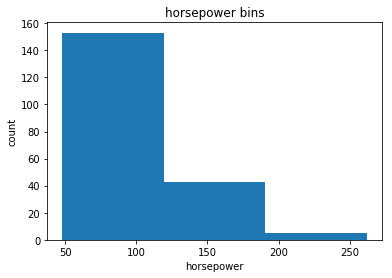

In [32]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0,1,2)

# Desenha o histograma do atributo "horsepower" com bins = 3
plt.pyplot.hist(df["horsepower"], bins = 3)

# Define as coordenadas de x/y, rótulos e o titulo do gráfico:
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

O gráfico acima mostra o resultado agrupado do atributo "horsepower".

<a id="ref8"></a>
# Variável indicadora (ou variável dummy/postiça/manequim)
**What is an indicator variable?**
<div>uma variável indicadora (ou variável dummy/postiça/manequim) é uma variável numérica usada para rotular categorias.
    elas são chamadas de 'postiças' porque seus numeros e valores não possuem nenhum significado inerente. </div>

**Por quê usamos variáveis indicadoras?**
<div>Nós podemos usar variáveis de categoria para analise de regressão posteriormente.</div>

**Exemplo**
<div>vemos que a coluna "fuel-type" possui dois valores únicos, "gas" ou "diesel". Como a Regressão não reconhece palavras, apenas números,  para usar este atributo na análise regressiva, vamos converter "fuel-type" em variáveis indicadoras.</div>

<div>Vamos utilizar o método 'get_dummies' do pandas para endereçar valores numéricos para diferentes categorias do fuel type. <div>

In [33]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-L/100km', 'price', 'city-L/100km', 'horsepower-binned'],
      dtype='object')

 Obter as variáveis indicadoras e endereçá-las para o dataframe "dummy_variable_1" 

In [34]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Alterar o nome das colunas para facilitar: 

In [35]:
dummy_variable_1.rename(columns={'fuel-type-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


Agora nós temos que o valor 0 representa "gas" e 1 representa "diesel" na coluna "fuel-type". Agora nós temos que inserir essa coluna novamente em nosso dataset original. 

In [36]:
# reunir(merge) o dataframe "df" e o  "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# Excluir a coluna original "fuel-type" de "df"
df.drop("fuel-type", axis = 1, inplace=True)

In [37]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,8.703704,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,9.038462,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,7.833333,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,10.681818,17450.0,13.055556,Medium,0,1


As duas ultimas colunas agora são as representações variaveis indicadoras da variável fuel-type. E agora tudo nelas são 0's e 1'sIt's all 0s and 1s !!!



<b>Agora tente criar uma variável indicadora para a coluna "aspiration": sendo 0 para "std" e 1 para "turbo".</b>
</div>

Spoiler...

<!-- resposta abaixo:

# Obtem as variáveis indicadoras de aspiration e endereça-as para o dataframe "dummy_variable_2" 
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# Altera o nome das colunas para facilitar a leitura
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# mostra as 5 primeiras linhas do dataframe "dummy_variable_1"
dummy_variable_2.head()

-->

<b>Agora, una o dataframe ao dataset original e exclua a coluna originária: 'aspiration'</b>
</div>

...

<!-- resposta abaixo:

#Unir o novo dataframe ao dataset original
df = pd.concat([df, dummy_variable_2], axis=1)

# Excluir a coluna originária "aspiration" do "df"
df.drop('aspiration', axis = 1, inplace=True)

-->

Só pra finalizar, salve o dataset em um novo arquivo CSV:

In [38]:
df.to_csv('clean_df.csv')